In [1]:
import numpy as np
import pandas as pd
import sklearn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
test_data= pd.read_csv("test.csv")
train_data= pd.read_csv("train.csv")

In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
test_data.shape

(28000, 784)

In [6]:
train_data.shape

(42000, 785)

In [7]:
test_data.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [8]:
train_data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

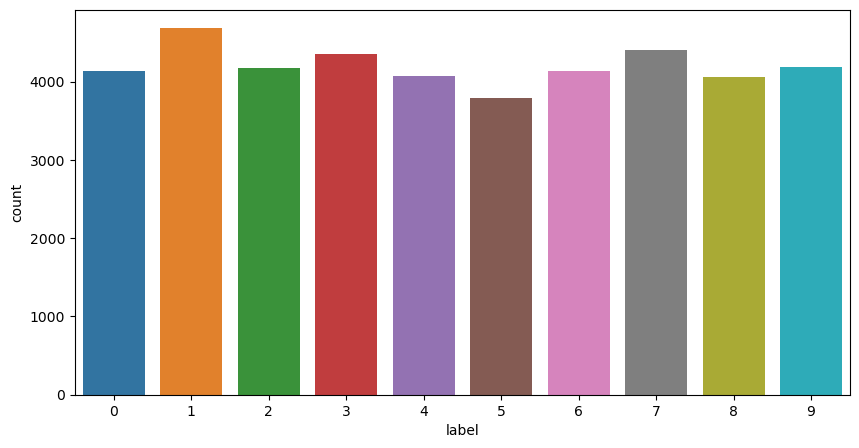

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x=train_data['label'])
plt.show()

In [10]:
x_train= train_data.drop(["label"], axis=1)
x_train.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [11]:
y_train=train_data["label"]
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [12]:
from keras.utils.np_utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D

In [13]:
y_train= to_categorical(y_train, num_classes=10)

In [14]:
x_train= x_train.values.reshape(-1,28,28,1)
x_train= x_train/255

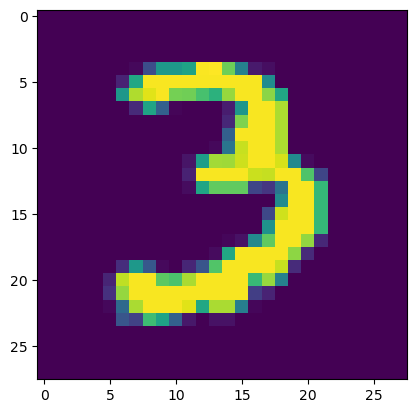

In [15]:
plt.imshow(x_train[9][:,:,0])

### MODEL BUILDING

In [16]:
from tensorflow.keras import layers

In [17]:
model = keras.Sequential()
model.add(Conv2D(filters = 32, kernel_size = 5,padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = 5,padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))

model.add(Dense(10, activation = "softmax"))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 256)               1605888   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [19]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 256)               1605888   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [20]:
epochs=2
batch_size=64
model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)

Epoch 1/2
657/657 [==============================] - 106s 158ms/step - loss: 0.1494 - accuracy: 0.9538
Epoch 2/2
657/657 [==============================] - 103s 157ms/step - loss: 0.0440 - accuracy: 0.9861


In [21]:
test_df= pd.read_csv("test.csv")
test_df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [22]:
x_test = test_df.values.reshape(-1, 28, 28, 1)
x_test = x_test / 255.0

In [23]:
y_test=model.predict(x_test)

875/875 [==============================] - 20s 22ms/step


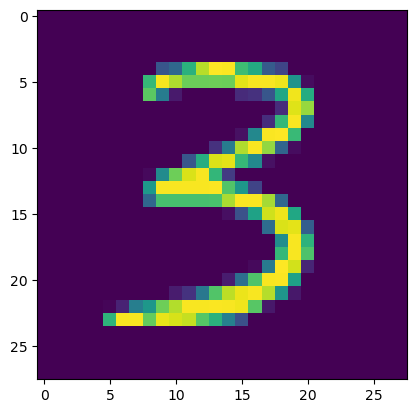

In [24]:
plt.imshow(x_test[9][:,:,0])
plt.show()

In [25]:
y_test[0]

array([7.80601681e-07, 5.45367591e-08, 9.99981999e-01, 7.77262585e-07,
       3.69053083e-07, 5.47421699e-08, 3.26011523e-10, 2.19986896e-06,
       1.20075265e-05, 1.73280534e-06], dtype=float32)

In [26]:
y_test=[np.argmax(y_test1) for y_test1 in y_test]

In [27]:
y_test[9]

3

In [29]:
submission= pd.read_csv("sample_submission.csv")

In [30]:
submission["Label"]=y_test

In [31]:
submission.head()

ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3

In [32]:
submission.to_csv("./sample_submission.csv", index= False)